In [13]:
%config InlineBackend.rc = {"figure.dpi": 72, "figure.figsize": (6.0, 4.0)}
%matplotlib inline

import abtem
import ase
import matplotlib.pyplot as plt
from ase.io import write

(examples:4d-stem_quickstart)=
# 4D-STEM quickstart

In [14]:
abtem.config.set({"device": "cpu"})
abtem.config.set({"fft": "mkl"})

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot: xlabel='x [Å]', ylabel='y [Å]'>)

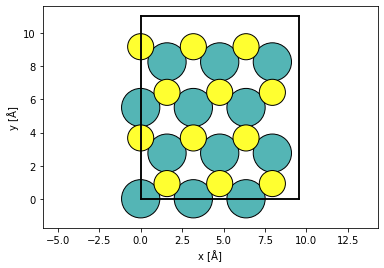

In [15]:
atoms = ase.build.mx2(vacuum=2)

atoms = abtem.orthogonalize_cell(atoms)

atoms *= (3, 2, 1)

abtem.show_atoms(atoms)

In [16]:
potential = abtem.Potential(atoms, sampling=0.05)

probe = abtem.Probe(energy=80e3, semiangle_cutoff=30)
probe.grid.match(potential)

In [17]:
grid_scan = abtem.GridScan.from_fractional_coordinates(
    potential,
    start=[0, 0],
    end=[1 / 3, 1 / 2],
    sampling=probe.aperture.nyquist_sampling,
)

In [18]:
detector = abtem.PixelatedDetector()

measurements = probe.scan(potential, scan=grid_scan, detectors=detector)
measurements.array

dask.array<mean_agg-aggregate, shape=(10, 16, 89, 89), dtype=float32, chunksize=(10, 16, 89, 89), chunktype=numpy.ndarray>

In [19]:
measurements.compute()

[########################################] | 100% Completed | 2.08 sms


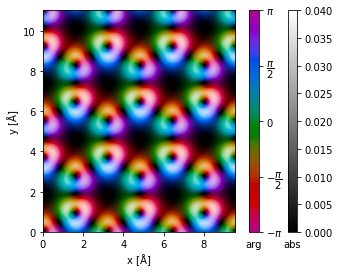

In [23]:
filtered_measurements = measurements.gaussian_source_size(.3)

center_of_mass = filtered_measurements.center_of_mass(units="reciprocal")

interpolated_center_of_mass = center_of_mass.interpolate(0.05).tile((3, 2))

interpolated_center_of_mass.show(cbar=True, vmax=0.04, vmin=0);

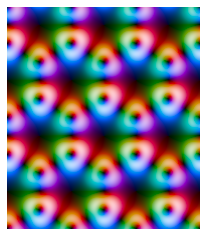

In [29]:
fig, ax = interpolated_center_of_mass.show(vmax=0.04, vmin=0.005)
ax.axis("off")
plt.savefig("../thumbnails/4d-stem_quickstart.png", bbox_inches="tight", pad_inches=0)